In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2
from keras.callbacks import LambdaCallback
from keras.utils import np_utils

In [19]:
sns.set_style('whitegrid')

### Config

In [4]:
n_samples = 2000
test_size = 0.2
epochs = 200

GRID_PADDING = 0.5
GRID_STEP = 0.01

### Create sample dataset

In [5]:
X, y = make_moons(n_samples = n_samples, shuffle = True, noise = 0.4, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 21)

### Definition of GRID

In [15]:
xmin, xmax = X[:, 0].min() - GRID_PADDING, X[:, 0].max() + GRID_PADDING
ymin, ymax = X[:, 1].min() - GRID_PADDING, X[:, 1].max() + GRID_PADDING
XX, YY = np.meshgrid(np.arange(xmin, xmax, GRID_STEP), np.arange(ymin, ymax, GRID_STEP))

### Plot dataset

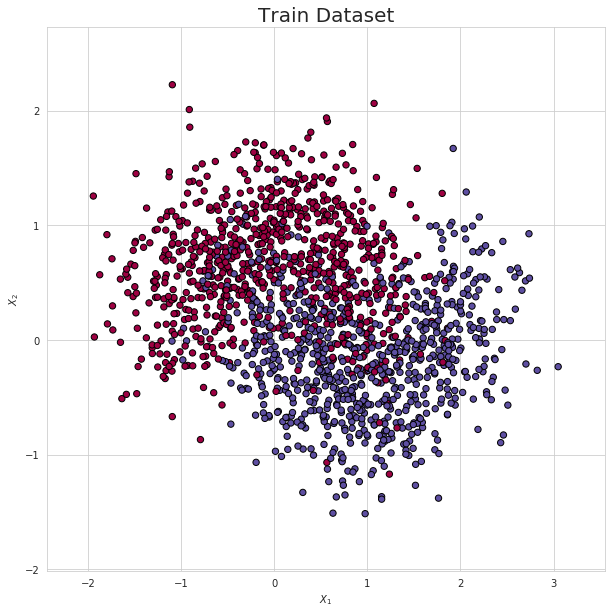

In [21]:
plt.figure(figsize = (10, 10))
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])
axes.set(xlabel="$X_1$", ylabel="$X_2$")
plt.title("Train Dataset", fontsize=20)
plt.scatter(x = X_train[:, 0], y = X_train[:, 1], c = y_train.ravel(), s = 40, cmap = plt.cm.Spectral, edgecolors = 'black')

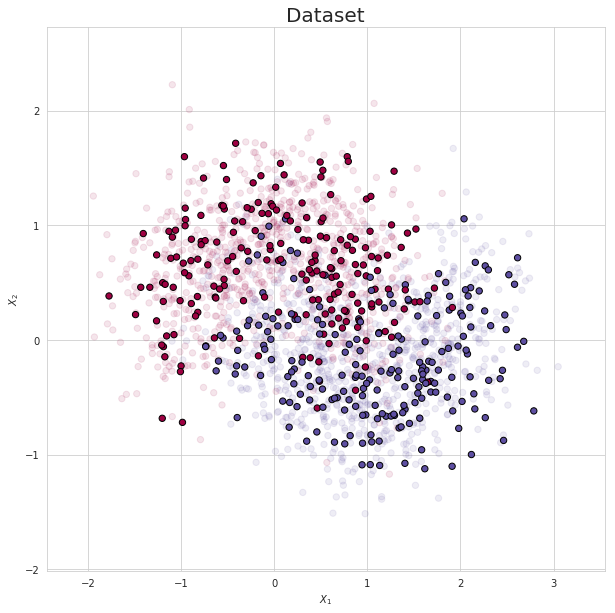

In [23]:
plt.figure(figsize = (10, 10))
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])
axes.set(xlabel="$X_1$", ylabel="$X_2$")
plt.title("Dataset", fontsize=20)
plt.scatter(x = X_train[:, 0], y = X_train[:, 1], c = y_train.ravel(), s = 40, cmap = plt.cm.Spectral, alpha = 0.1)
plt.scatter(x = X_test[:, 0], y = X_test[:, 1], c = y_test.ravel(), s = 40, cmap = plt.cm.Spectral, edgecolors = 'black')

### Auxillary plotting function

In [33]:
def make_plot(X, y, XX, YY, preds, plot_name):
    plt.figure(figsize = (10, 10))
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=20)
    plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 0.6, cmap = cm.Spectral)                       ##IMP
    plt.contour(XX, YY, preds.reshape(XX.shape), levels = [.5], cmap = "Greys", vmin = 0, vmax = 0.6)        ##IMP
    plt.scatter(X[:, 0], X[:, 1], c = y.ravel(), s = 40, cmap = plt.cm.Spectral, edgecolors = 'black')

### Logistic Regression (High Bias)

In [28]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_train_pred_1 = regressor.predict(X_train)
y_test_pred_1 = regressor.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred_1)
test_acc = accuracy_score(y_test, y_test_pred_1)
print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

Train accuracy: 0.84125
Test accuracy: 0.815


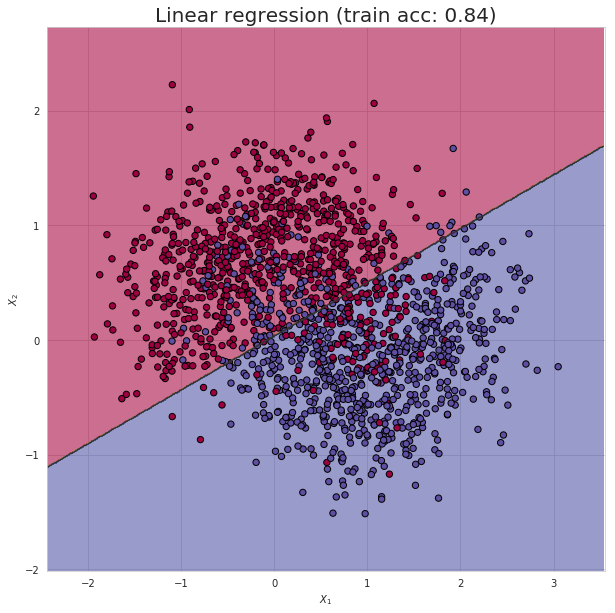

In [34]:
preds = regressor.predict(np.c_[XX.ravel(), YY.ravel()])       # concatenating XX and YY along second axis
title = "Linear regression (train acc: {0:.2f})".format(train_acc)
make_plot(X_train, y_train, XX, YY, preds, title)

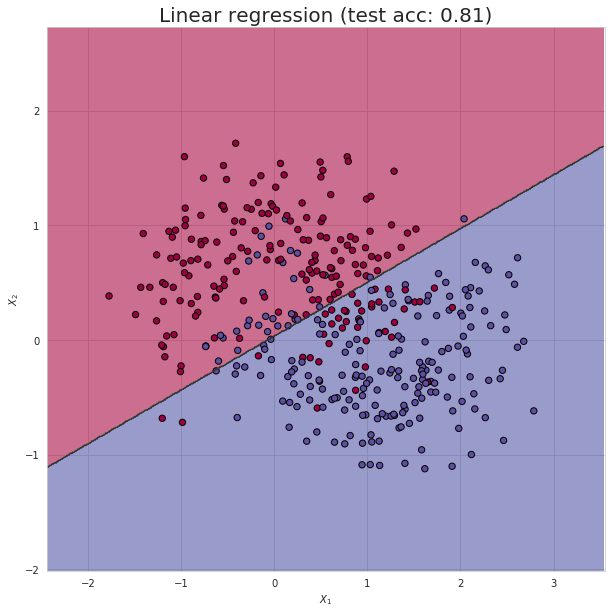

In [35]:
preds = regressor.predict(np.c_[XX.ravel(), YY.ravel()])       # concatenating XX and YY along second axis
title = "Linear regression (test acc: {0:.2f})".format(test_acc)
make_plot(X_test, y_test, XX, YY, preds, title)

### NN (High Variance)

In [67]:
model = Sequential()
model.add(Dense(8, input_dim=2,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, verbose=0)

In [68]:
y_train_pred_2 = model.predict_classes(X_train)
y_test_pred_2 = model.predict_classes(X_test)
train_acc = accuracy_score(y_train, y_train_pred_2)
test_acc = accuracy_score(y_test, y_test_pred_2)
print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

Train accuracy: 0.888125
Test accuracy: 0.84


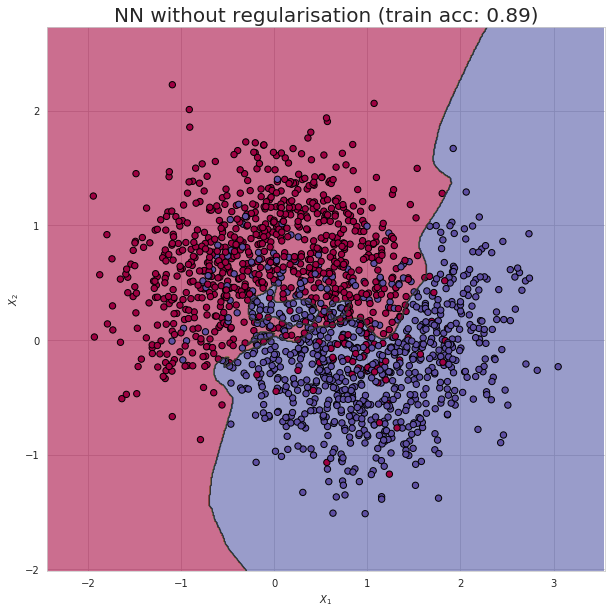

In [69]:
preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()], batch_size = 32, verbose = 0)
title = "NN without regularisation (train acc: {0:.2f})".format(train_acc)
make_plot(X_train, y_train, XX, YY, preds, title)

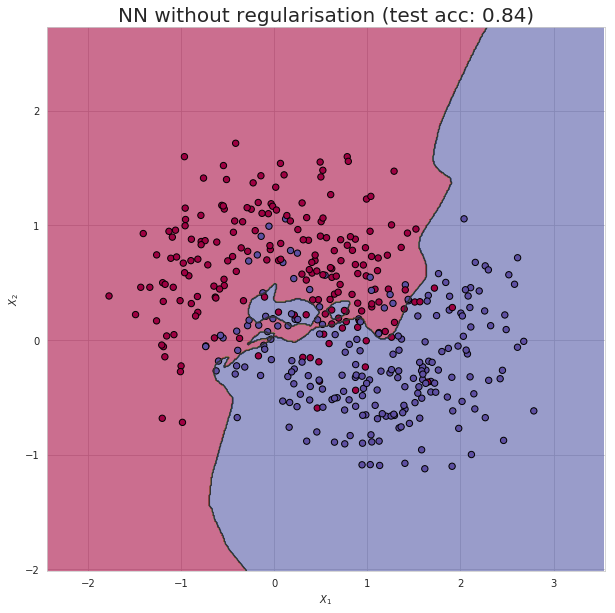

In [70]:
preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()], batch_size = 32, verbose = 0)
title = "NN without regularisation (test acc: {0:.2f})".format(test_acc)
make_plot(X_test, y_test, XX, YY, preds, title)

### Neural network with regularisation (just right)

In [71]:
model = Sequential()
model.add(Dense(8, input_dim=2,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, verbose=0)

In [72]:
y_train_pred_3 = model.predict_classes(X_train)
y_test_pred_3 = model.predict_classes(X_test)
train_acc = accuracy_score(y_train, y_train_pred_3)
test_acc = accuracy_score(y_test, y_test_pred_3)
print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

Train accuracy: 0.874375
Test accuracy: 0.85


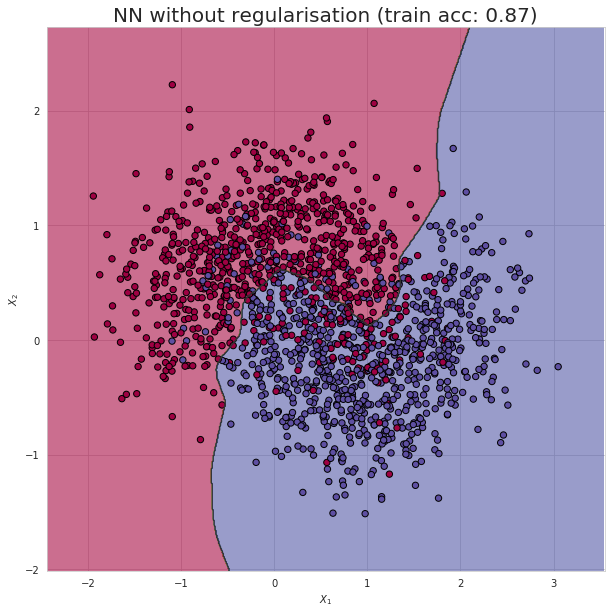

In [73]:
preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()], batch_size = 32, verbose = 0)
title = "NN without regularisation (train acc: {0:.2f})".format(train_acc)
make_plot(X_train, y_train, XX, YY, preds, title)

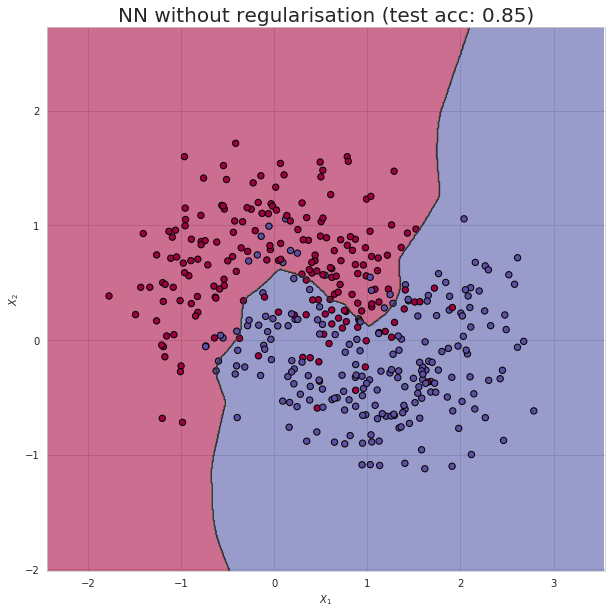

In [74]:
preds = model.predict_classes(np.c_[XX.ravel(), YY.ravel()], batch_size = 32, verbose = 0)
title = "NN without regularisation (test acc: {0:.2f})".format(test_acc)
make_plot(X_test, y_test, XX, YY, preds, title)

### SVM

In [76]:
classifier = SVC()
classifier.fit(X_train, y_train)
y_train_pred_4 = classifier.predict(X_train)
y_test_pred_4 = classifier.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred_4)
test_acc = accuracy_score(y_test, y_test_pred_4)
print("Train accuracy: " + str(train_acc))
print("Test accuracy: " + str(test_acc))

Train accuracy: 0.864375
Test accuracy: 0.8575


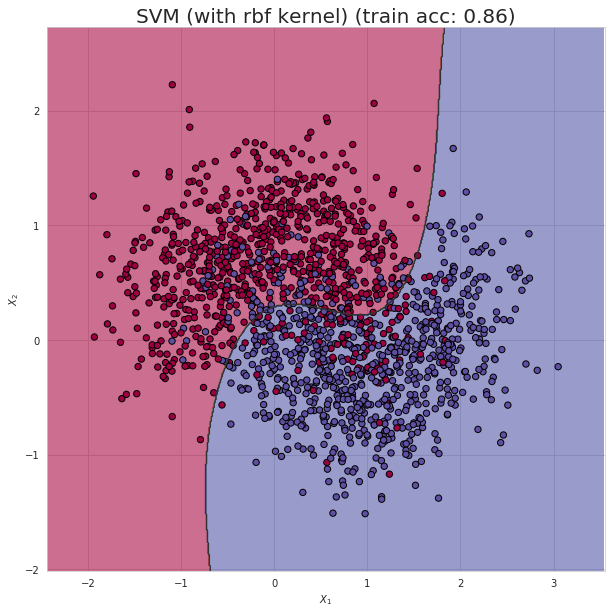

In [77]:
preds = classifier.predict(np.c_[XX.ravel(), YY.ravel()])       # concatenating XX and YY along second axis
title = "SVM (with rbf kernel) (train acc: {0:.2f})".format(train_acc)
make_plot(X_train, y_train, XX, YY, preds, title)

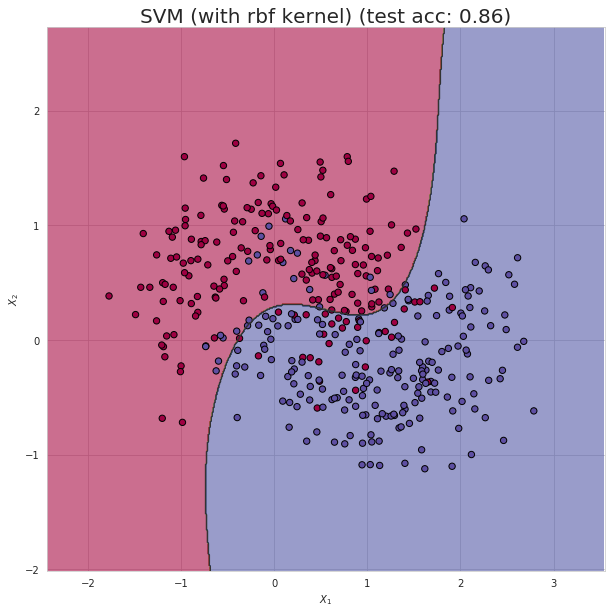

In [78]:
preds = classifier.predict(np.c_[XX.ravel(), YY.ravel()])       # concatenating XX and YY along second axis
title = "SVM (with rbf kernel) (test acc: {0:.2f})".format(test_acc)
make_plot(X_test, y_test, XX, YY, preds, title)